In [1]:
"""
cfg.py 

Simulation configuration for S1 model (using NetPyNE)
This file has sim configs as well as specification for parameterized values in netParams.py 

Contributors: salvadordura@gmail.com, fernandodasilvaborges@gmail.com
"""
# import matplotlib
from netpyne import specs, sim

%matplotlib inline

cfg = specs.SimConfig()  

cfg.duration = 5.0*1e2 ## Duration of the sim, in ms  
cfg.dt = 0.025
cfg.seeds = {'conn': 4321, 'stim': 4321, 'loc': 4321} 
cfg.hParams = {'celsius': 34, 'v_init': -71}  
cfg.verbose = False
cfg.createNEURONObj = True
cfg.createPyStruct = True  

In [2]:
#--------------------------------------------------------------------------
# Recording 
#--------------------------------------------------------------------------

cellName = 'L5_TTPC2_cADpyr_1' # L5_TTPC2_cADpyr_1_cellParams.json

cfg.allpops = [cellName]

cfg.recordCells = cfg.allpops # record all cells                
cfg.recordTraces = {'V_soma': {'sec':'soma_0', 'loc':0.5, 'var':'v'},
                    'V_axon_0': {'sec':'axon_0', 'loc':0.5, 'var':'v'},
                    'V_Myelin_0': {'sec':'Myelin_0', 'loc':0.5, 'var':'v'},
                    'V_Myelin_10': {'sec':'Myelin_10', 'loc':0.5, 'var':'v'},
                    'V_Node_0': {'sec':'Node_0', 'loc':0.5, 'var':'v'},
                    'V_Node_10': {'sec':'Node_10', 'loc':0.5, 'var':'v'},
                    'V_Unmyelin_0': {'sec':'Unmyelin_0', 'loc':0.5, 'var':'v'},
                    'V_Unmyelin_10': {'sec':'Unmyelin_10', 'loc':0.5, 'var':'v'},
                    'V_apic_0': {'sec':'apic_0', 'loc':0.5, 'var':'v'},
                    'V_apic_5': {'sec':'apic_5', 'loc':0.5, 'var':'v'},
                    'V_apic_95': {'sec':'apic_95', 'loc':0.5, 'var':'v'},                
                    'V_dend_5': {'sec':'dend_5', 'loc':0.5, 'var':'v'},
                    'V_dend_65': {'sec':'dend_65', 'loc':0.5, 'var':'v'},
                    # 'V_dend_70': {'sec':'dend_70', 'loc':0.5, 'var':'v'},
                    }

cfg.recordStim = True
cfg.recordTime = True
cfg.recordStep = 0.025  

cfg.analysis['plotTraces'] = {'include': cfg.recordCells, 'oneFigPer': 'cell', 'overlay': True, 'timeRange': [200,cfg.duration], 'saveFig': True, 'showFig': False, 'figSize':(18,12)}


In [3]:
#------------------------------------------------------------------------------
# Saving
#------------------------------------------------------------------------------
cfg.simLabel = 'singleCelltest'
cfg.saveFolder = '../data/'+cfg.simLabel
cfg.savePickle = False         	## Save pkl file
cfg.saveJson = False	           	## Save json file
cfg.saveDataInclude = ['simData'] ## , 'netParams', 'simConfig', ,'simData'
cfg.backupCfgFile = None
cfg.gatherOnlySimData = False
cfg.saveCellSecs = True
cfg.saveCellConns = True

In [4]:
"""
netParams.py
"""
# Network parameters
netParams = specs.NetParams()  # object of class NetParams to store the network parameters

netParams.scale = 1.0 # Scale factor for number of cells
netParams.sizeX = 420.0 # x-dimension (horizontal length) size in um
netParams.sizeY = 2082.0 # y-dimension (vertical height or cortical depth) size in um
netParams.sizeZ = 420.0 # z-dimension (horizontal depth) size in um
netParams.shape = 'cylinder' # cylindrical (column-like) volume

# r = 210 um and hexagonal side length = 230.9 um

In [5]:
#------------------------------------------------------------------------------
# General connectivity parameters
#------------------------------------------------------------------------------
netParams.defaultThreshold = -10.0 # spike threshold, 10 mV is NetCon default, lower it for all cells
netParams.defaultDelay = 0.1 # default conn delay (ms)
netParams.propVelocity = 300.0 #  300 μm/ms (Stuart et al., 1997)
netParams.scaleConnWeightNetStims = 0.001  # weight conversion factor (from nS to uS)

In [6]:
#------------------------------------------------------------------------------
# Population parameters
#------------------------------------------------------------------------------

netParams.popParams[cellName] = {'cellType': cellName, 'cellModel': 'HH_full', 'numCells': 1}
netParams.loadCellParamsRule(label = cellName, fileName = 'cells/'+cellName+'_cellParams.json') 
netParams.cellParams[cellName]['conds']['cellType'] = cellName

if cellName == 'L5_TTPC2_cADpyr_1': # this cell has 'Node_113' 'diam' = 1000.0 
    netParams.cellParams[cellName]['secs']['Node_113']['geom']['diam'] = 1.0
    netParams.cellParams[cellName]['secs']['Node_113']['geom']['pt3d'] = [(-22.136661529541016, -6.852905750274658, -709.5120239257812, 1.0),
    (-22.494400024414062, -7.216529846191406, -710.219970703125, 1.0),
    (-22.545791625976562, -7.267182350158691, -710.3250122070312, 1.0)]

## Stimulation

In [7]:
from stimulation import make_extracellular_stimuli

#------------------------------------------------------------------------------
# External Stimulation
#------------------------------------------------------------------------------

# The parameters of the extracellular point current source
cfg.acs_params = {'position': [0.0, -1710.0, 0.0],  # um # y = [pia, bone]
              'amp': -1250.,  # uA,
              'stimstart': 300,  # ms
              'stimend': 400.0,  # ms
              'frequency': 5,  # Hz
              'sigma': 0.57  # decay constant S/m
              }


## Run small Nets in a sigle job


Start time:  2024-07-15 11:35:14.474663

Creating network of 1 cell populations on 1 hosts...
  Number of cells on node 0: 1 
  Done; cell creation time = 0.20 s.
Making connections...
  Number of connections on node 0: 0 
  Done; cell connection time = 0.00 s.
  Number of stims on node 0: 0 
  Done; cell stims creation time = 0.00 s.
Recording 14 traces of 14 types on node 0

 {'cellType': 'L5_TTPC2_cADpyr_1', 'cellModel': 'HH_full', 'pop': 'L5_TTPC2_cADpyr_1', 'xnorm': 0.65048060320456, 'ynorm': 0.7647656351875594, 'znorm': 0.42104209446381713, 'x': 273.2018533459152, 'y': 1592.2420524604986, 'z': 176.83767967480318, 'label': ['L5_TTPC2_cADpyr_1']} nsec = 976

Running simulation using NEURON for 500.0 ms...
  Done; run time = 33.60 s; real-time ratio: 0.01.

Gathering data...
  Done; gather time = 0.13 s.

Analyzing...
  Cells: 1
  Connections: 0 (0.00 per cell)
  Spikes: 1 (2.00 Hz)
  Simulated time: 0.5 s; 1 workers
  Run time: 33.60 s
Plotting recorded cell traces ... cell
  Done

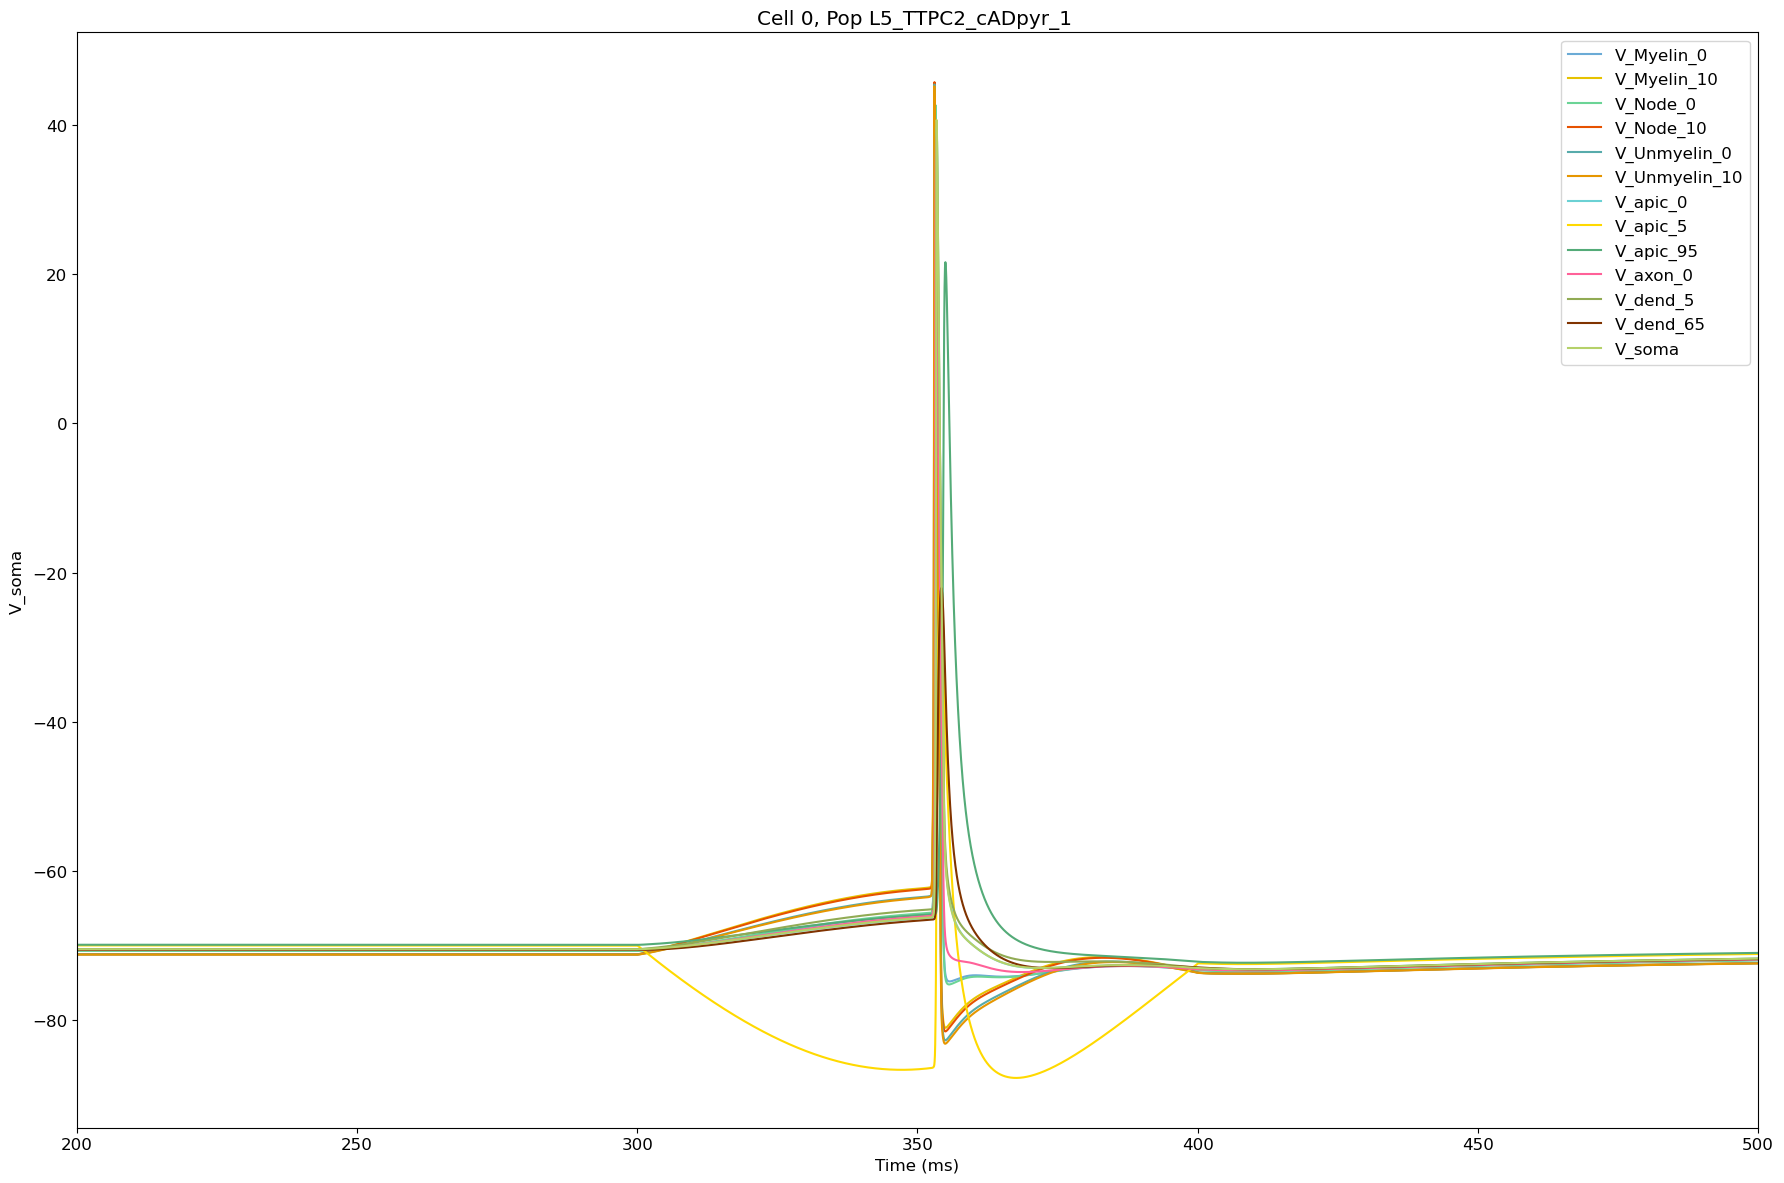

In [8]:
sim.initialize(
    simConfig = cfg, 	
    netParams = netParams)  				# create network object and set cfg and net params

sim.net.createPops()               			# instantiate network populations
sim.net.createCells();              			# instantiate network cells based on defined populations
sim.net.connectCells()            			# create connections between cells based on params
sim.net.addStims() 							# add network stimulation
sim.setupRecording()              			# setup variables to record for each cell (spikes, V traces, etc)
sim.net.defineCellShapes()

#Add extracellular stim
for c,metype in enumerate(sim.net.cells):
    if 'presyn' not in metype.tags['pop']:
        secList = [secs for secs in metype.secs.keys() if "pt3d" in metype.secs[secs]['geom']]
        print("\n", metype.tags, "nsec =",len(secList))
        # print(secList)
        v_cell_ext, cell = make_extracellular_stimuli(cfg.acs_params, metype, secList)


sim.runSim()                      			# run parallel Neuron simulation  

for c,metype in enumerate(sim.net.cells):
    if 'presyn' not in metype.tags['pop']:
        # print("\n", metype.tags)
        metype.t_ext.clear()
        metype.v_ext.clear()

sim.gatherData()                  			# gather spiking data and cell info from each node
sim.saveData()                    			# save params, cell info and sim output to file (pickle,mat,txt,etc)#
sim.analysis.plotData()  

## Traces

Plotting recorded cell traces ... cell


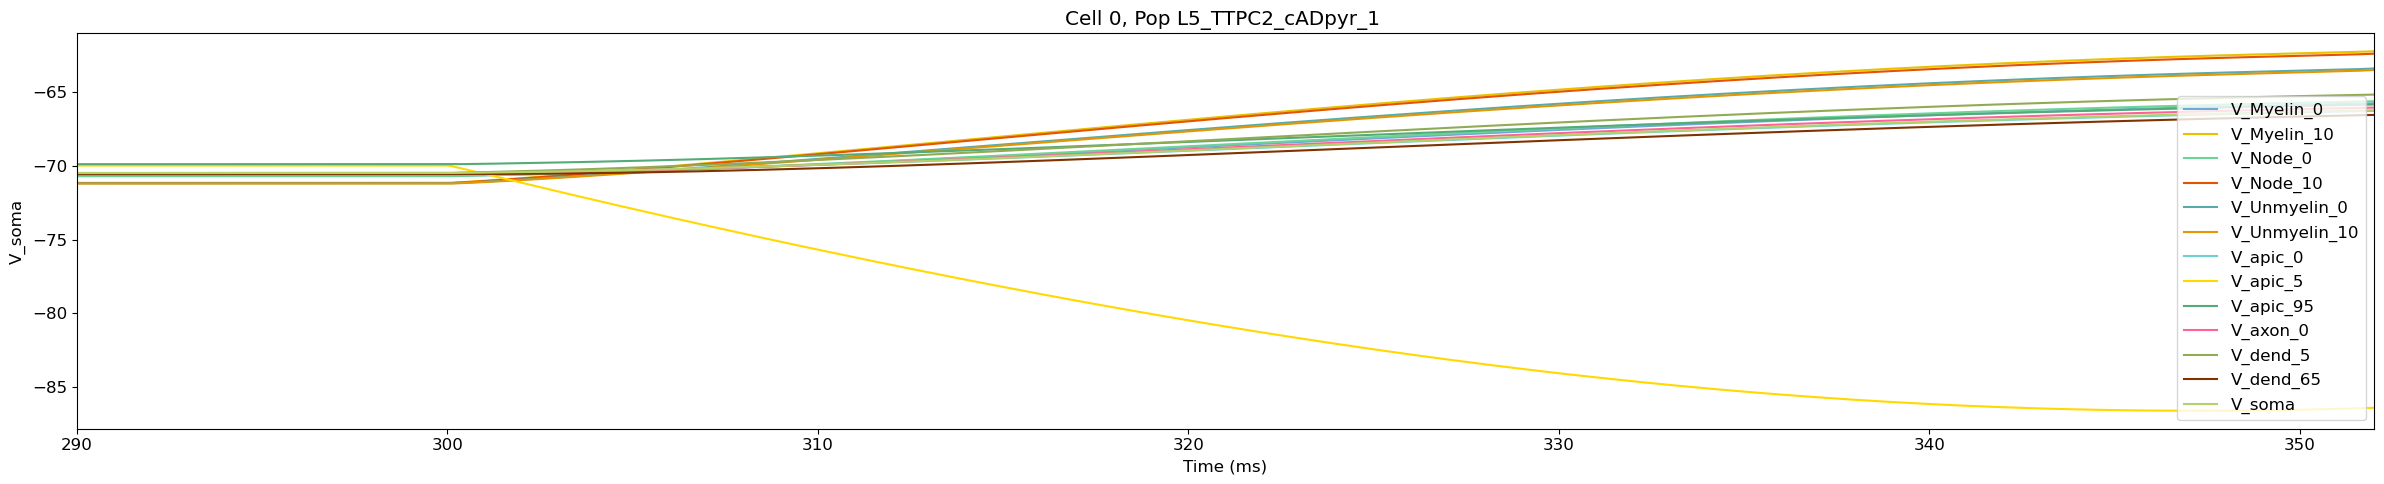

Plotting recorded cell traces ... cell


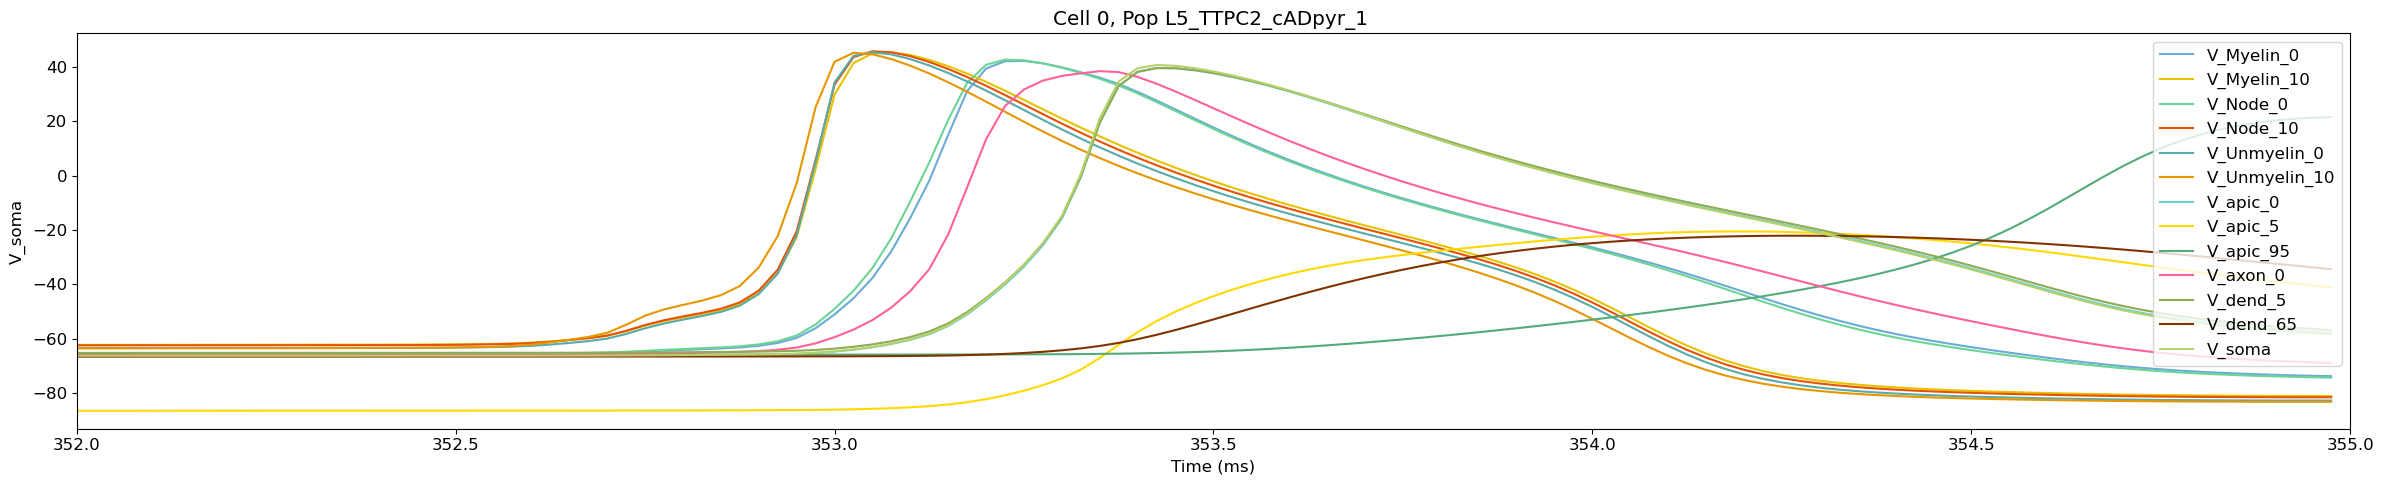

In [9]:
sim.analysis.plotTraces(timeRange=[290,352],figSize=(24,5), overlay=True);
sim.analysis.plotTraces(timeRange=[352,355],figSize=(24,5), overlay=True);

Plotting recorded cell traces ... cell


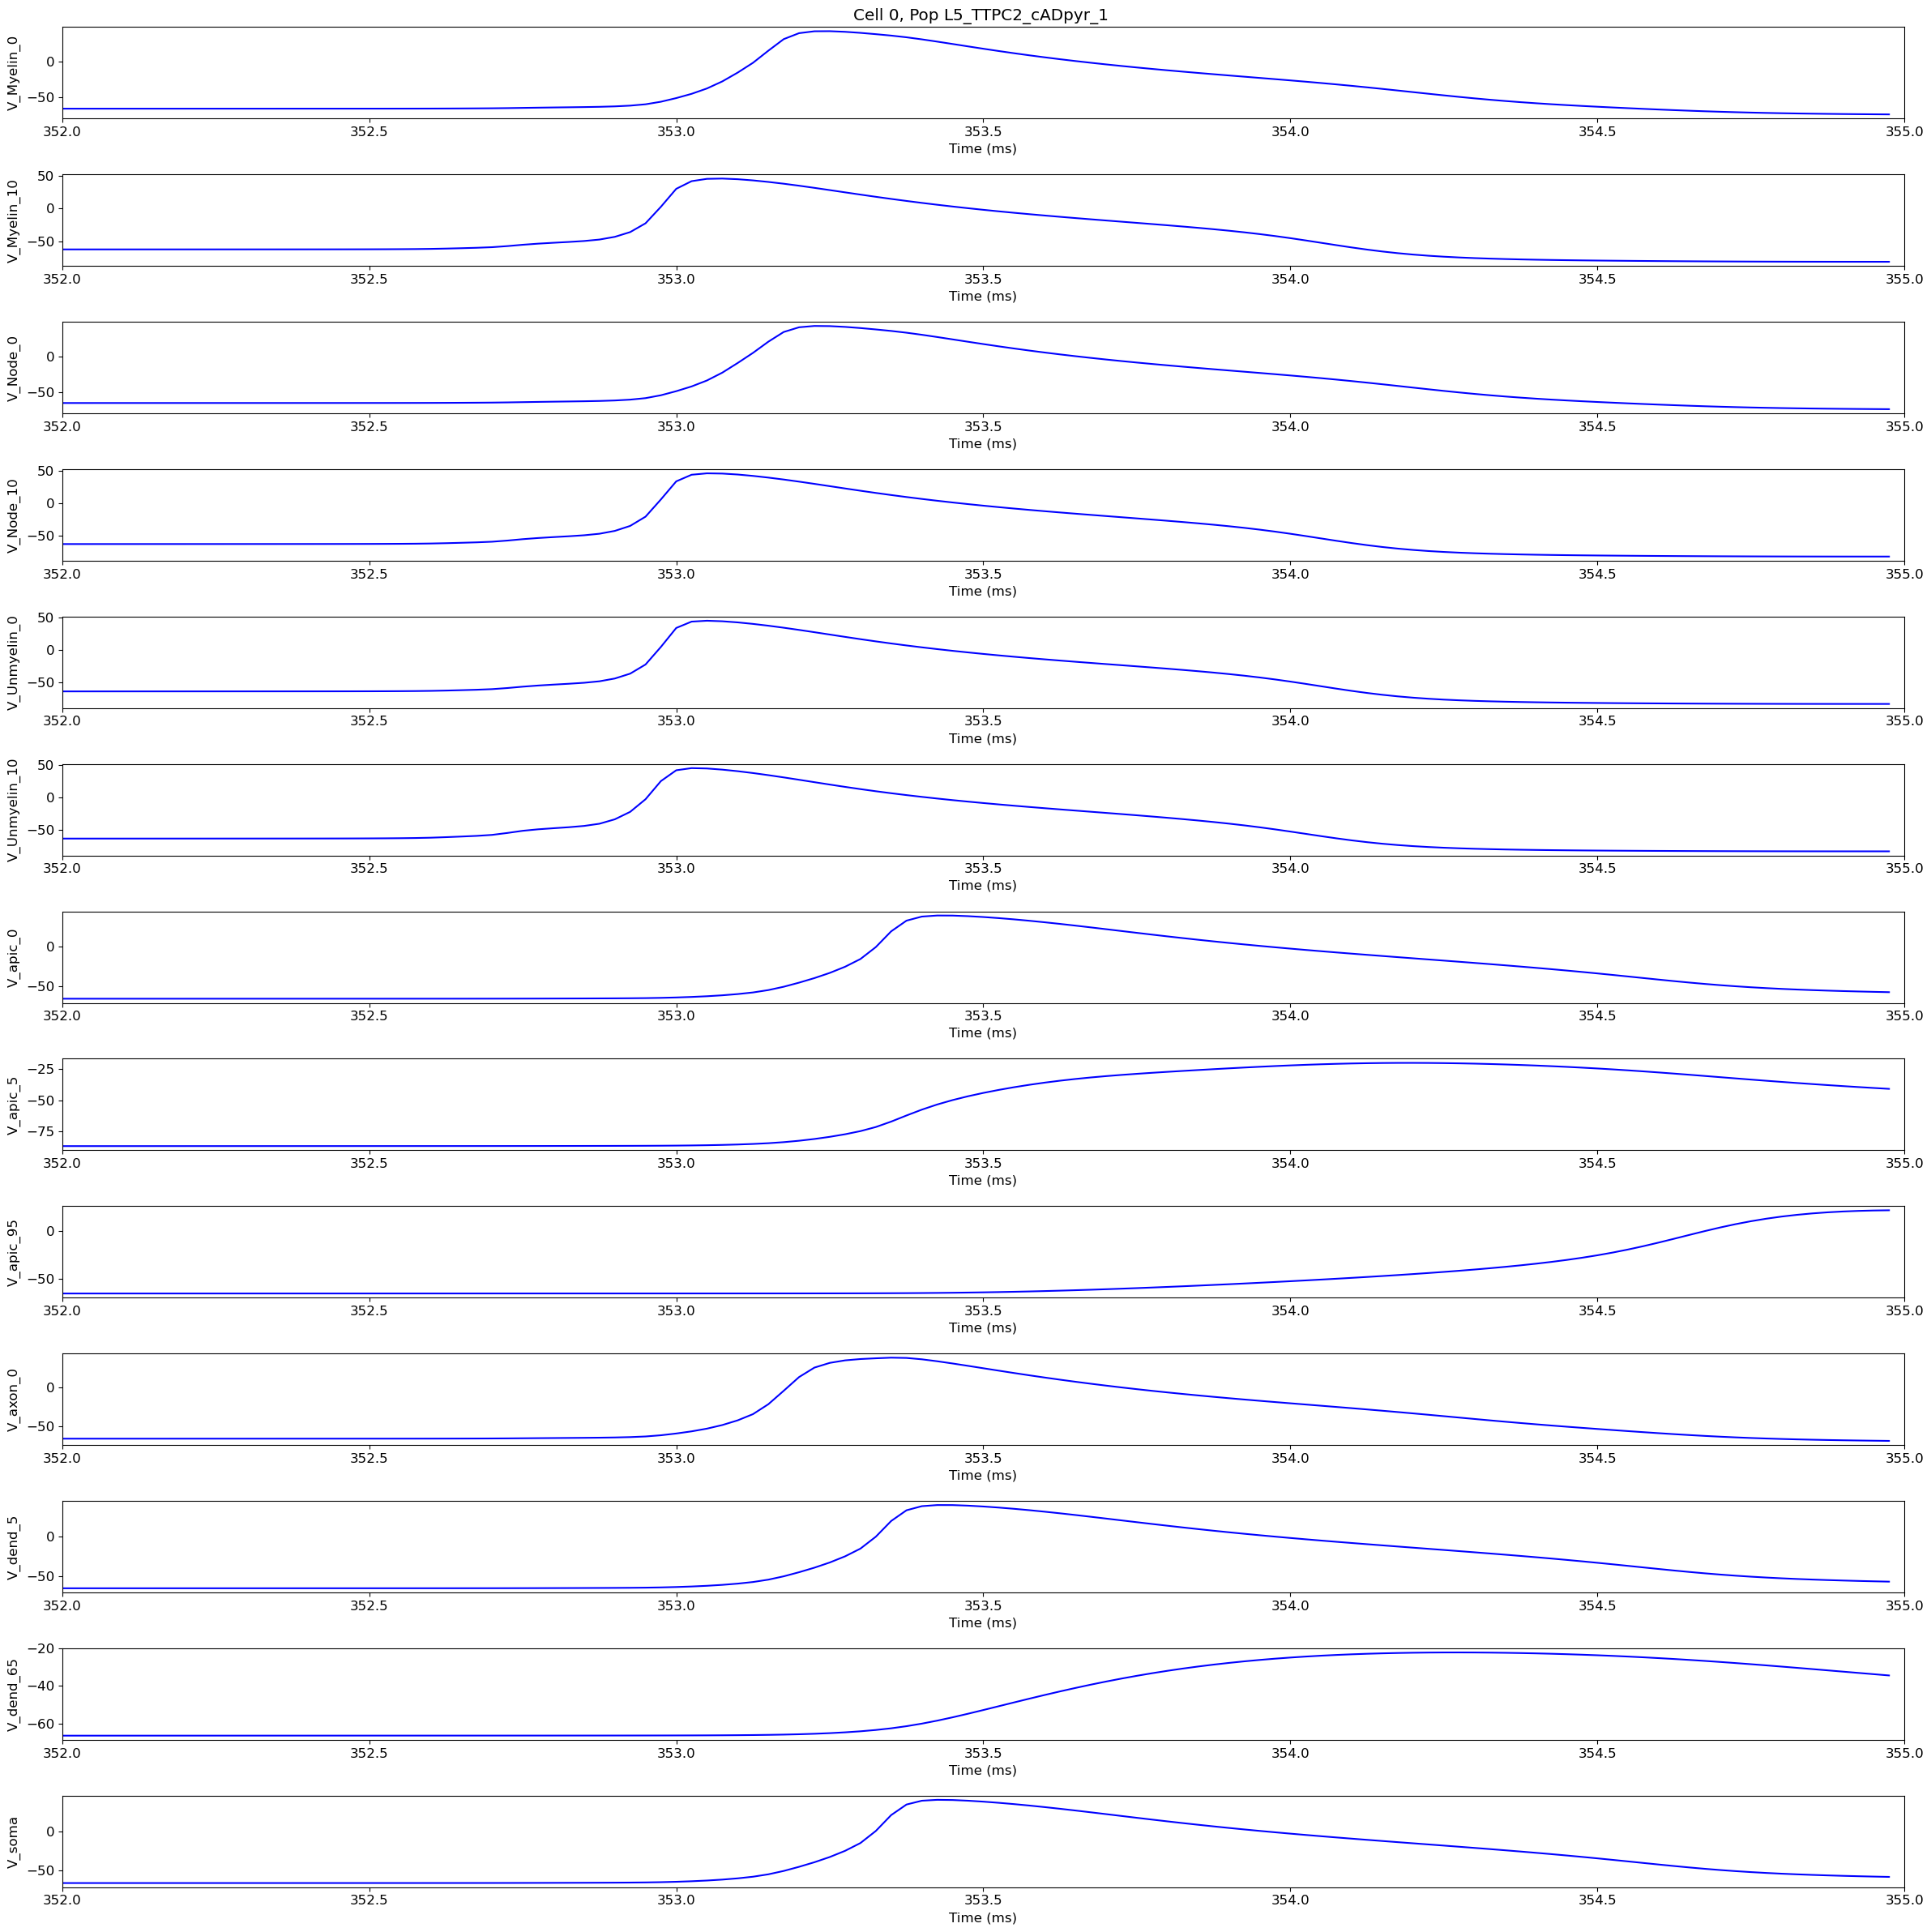

In [10]:
sim.analysis.plotTraces(timeRange=[352,355],figSize=(24,24), overlay=False);

Plotting 3D cell shape ...


(<Figure size 2400x2400 with 2 Axes>, {})

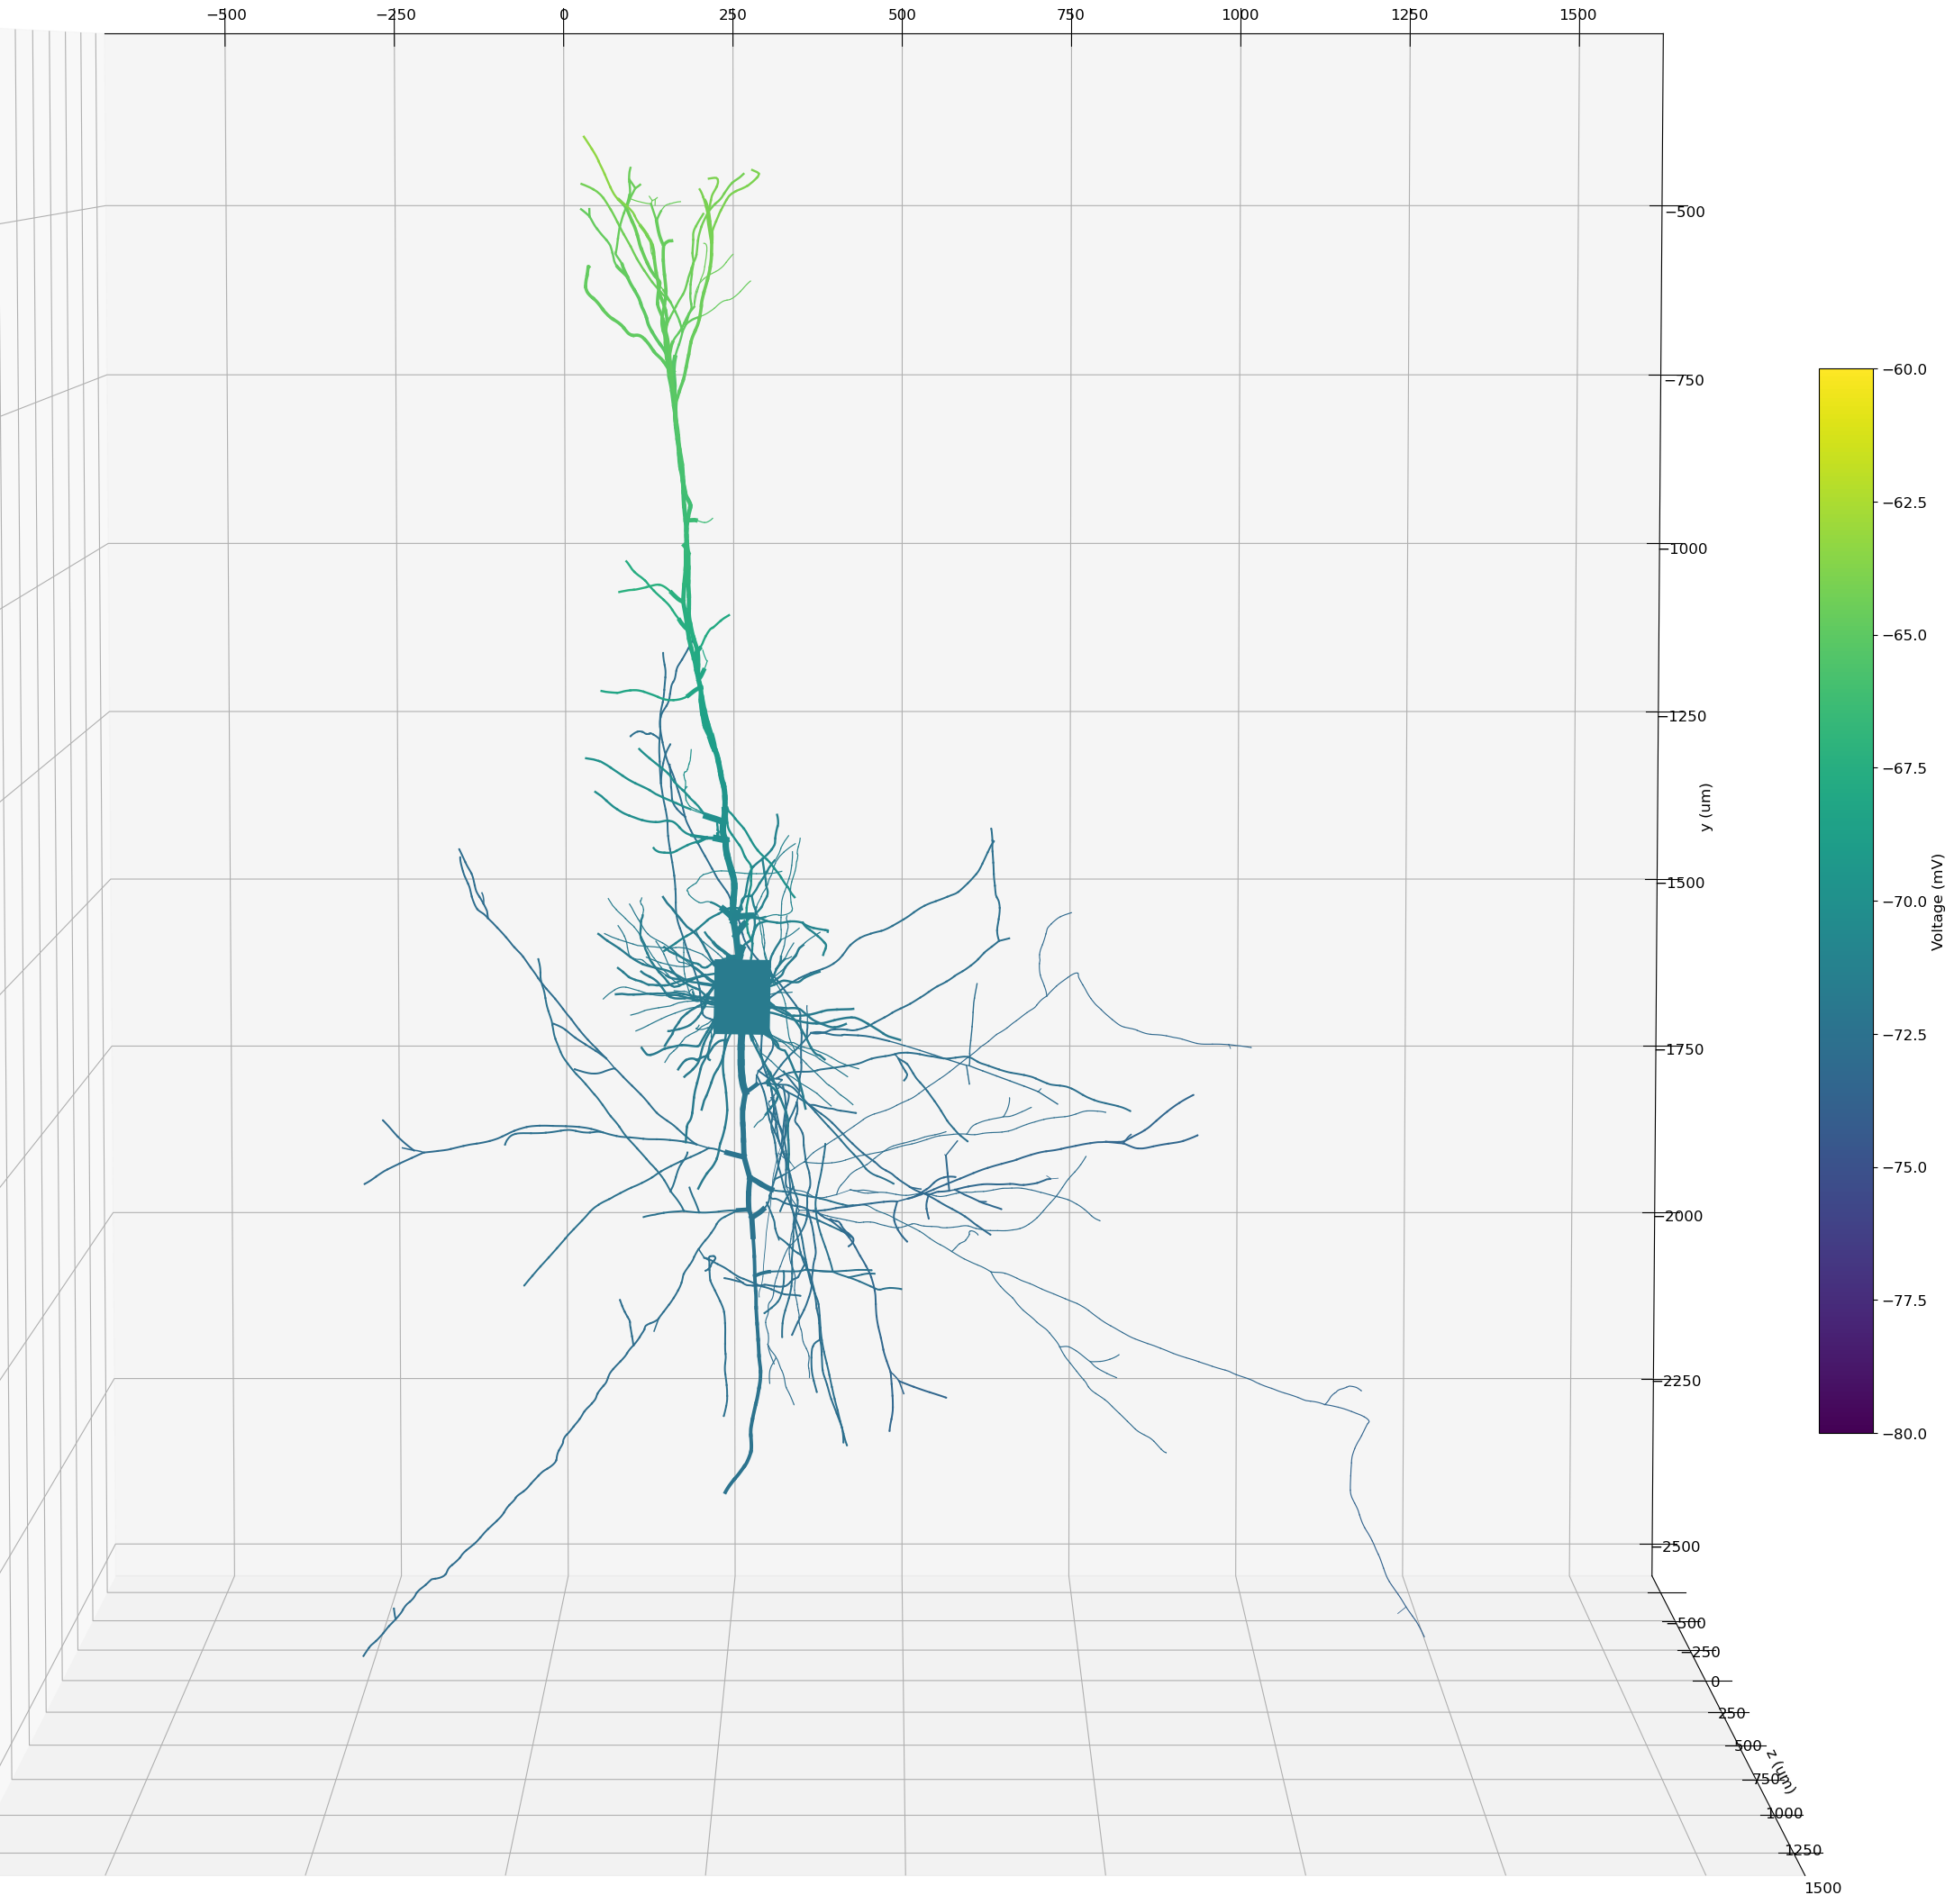

In [15]:
sim.analysis.plotShape(includePre=[cellName], includePost=[cellName], includeAxon=True, showSyns=False, showElectrodes=False,
    cvar= 'voltage', dist=0.6, elev=95, azim=-90, 
    axisLabels=True, synStyle='o', 
    clim= [-80, -60], showFig=False, synSize=2, saveFig=True, figSize=(24,24))